Installing OCR pytesseract

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


Import the libraries used

In [2]:
import numpy as np 
import cv2 
from google.colab.patches import cv2_imshow
import pytesseract
import imutils
from imutils.perspective import four_point_transform

Read the image and convert to binary

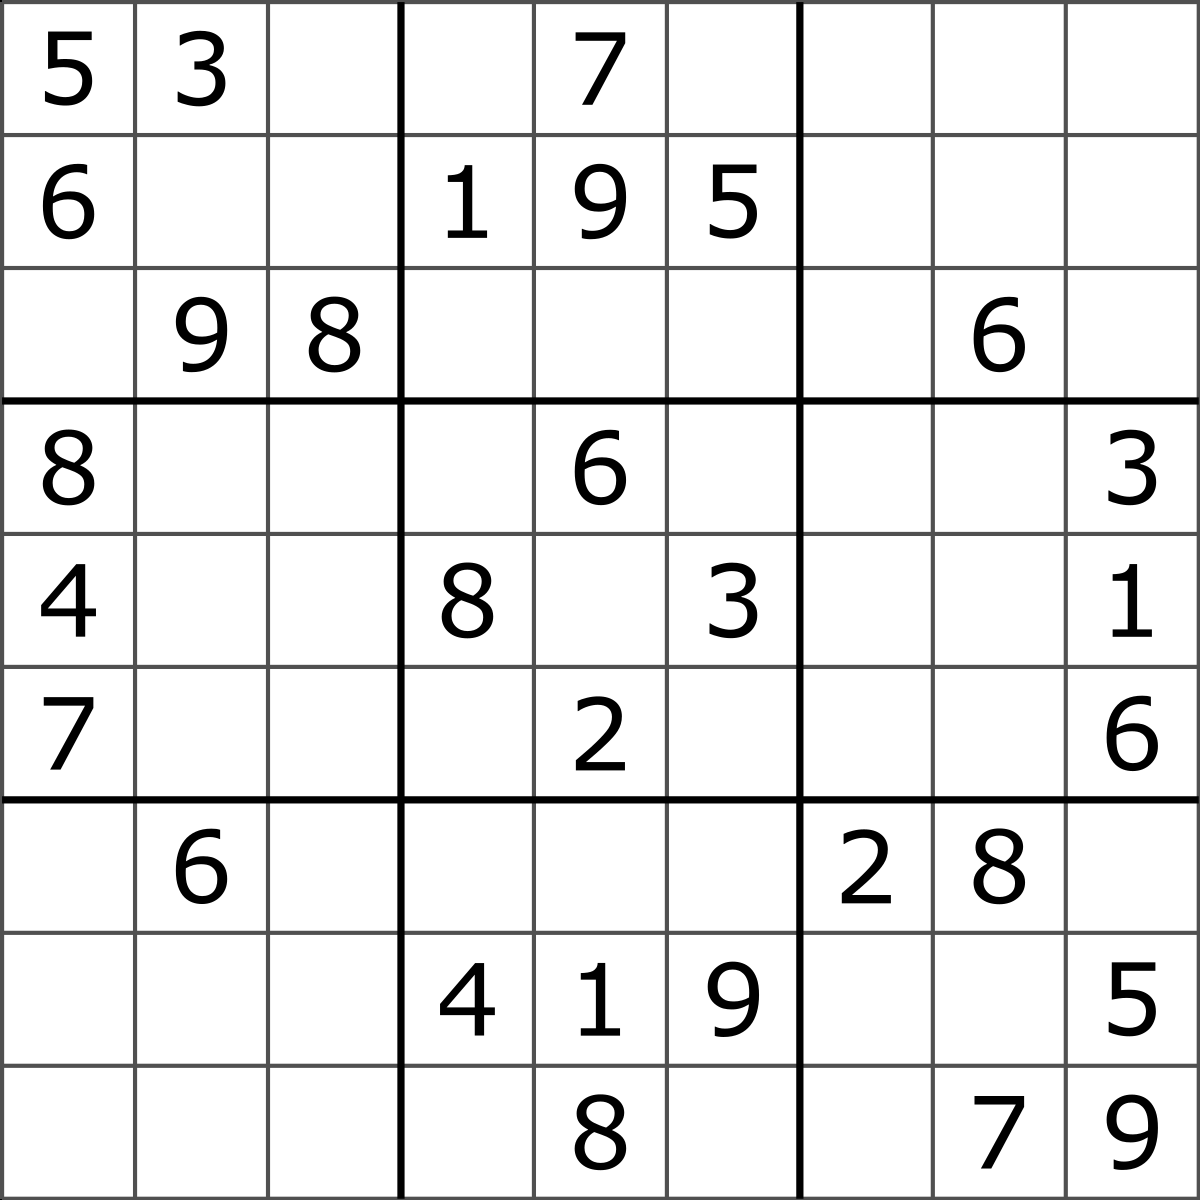

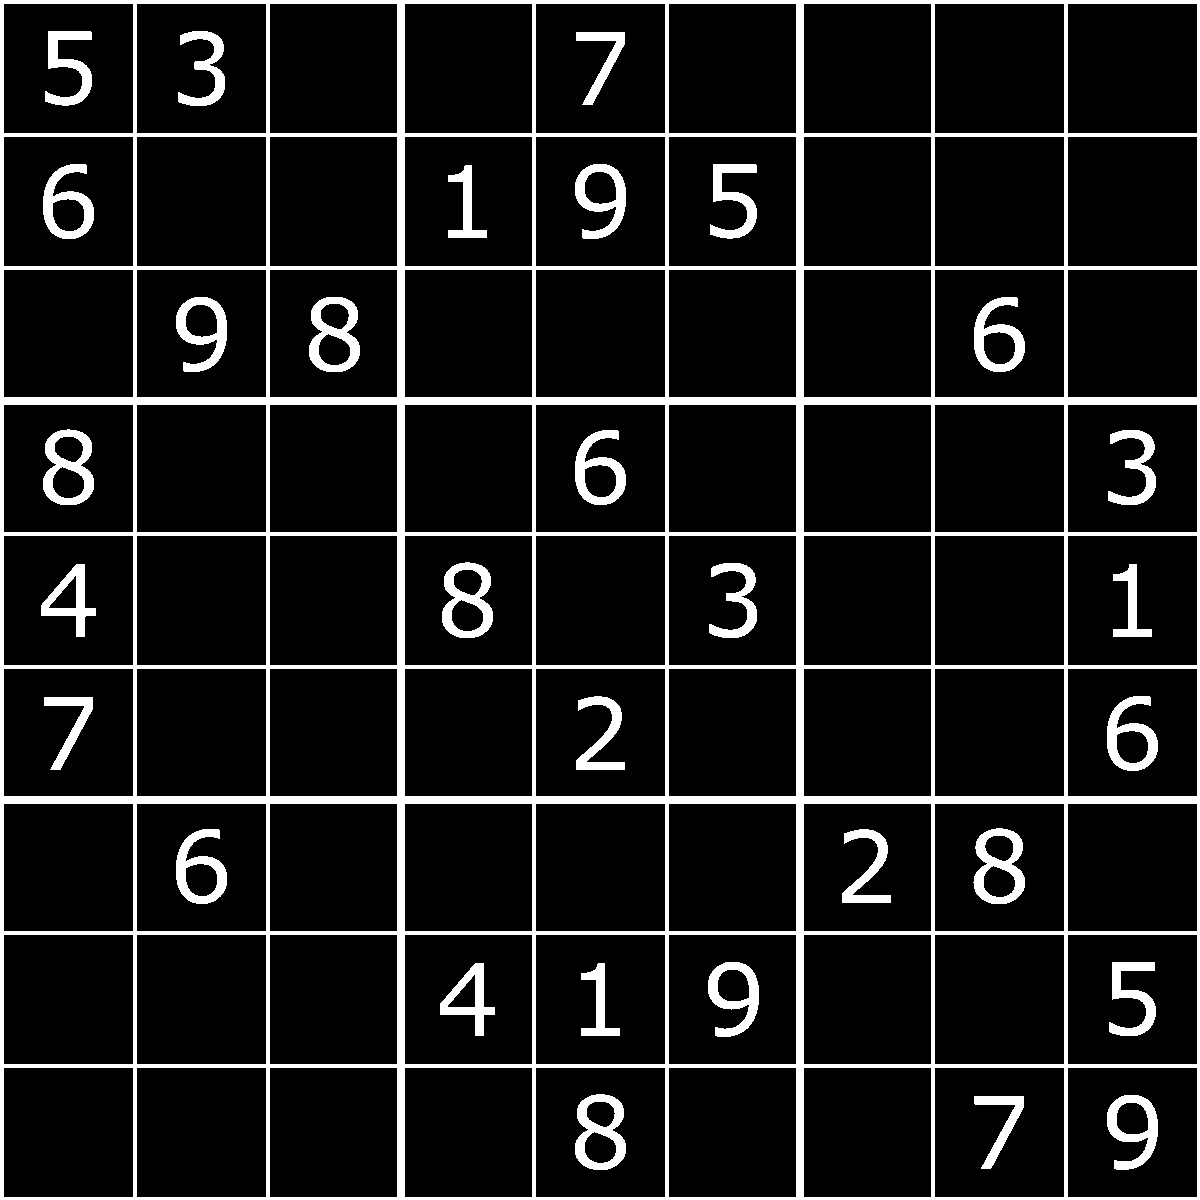

In [3]:
# Load image, convert to grayscale, Otsu's threshold
image = cv2.imread('/content/drive/MyDrive/s6.png')
cv2_imshow(image) 
#convert image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray) 

#convert image to binary
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2_imshow(thresh) 

Detect the sudoku grid boundary and crop the sudoku grid

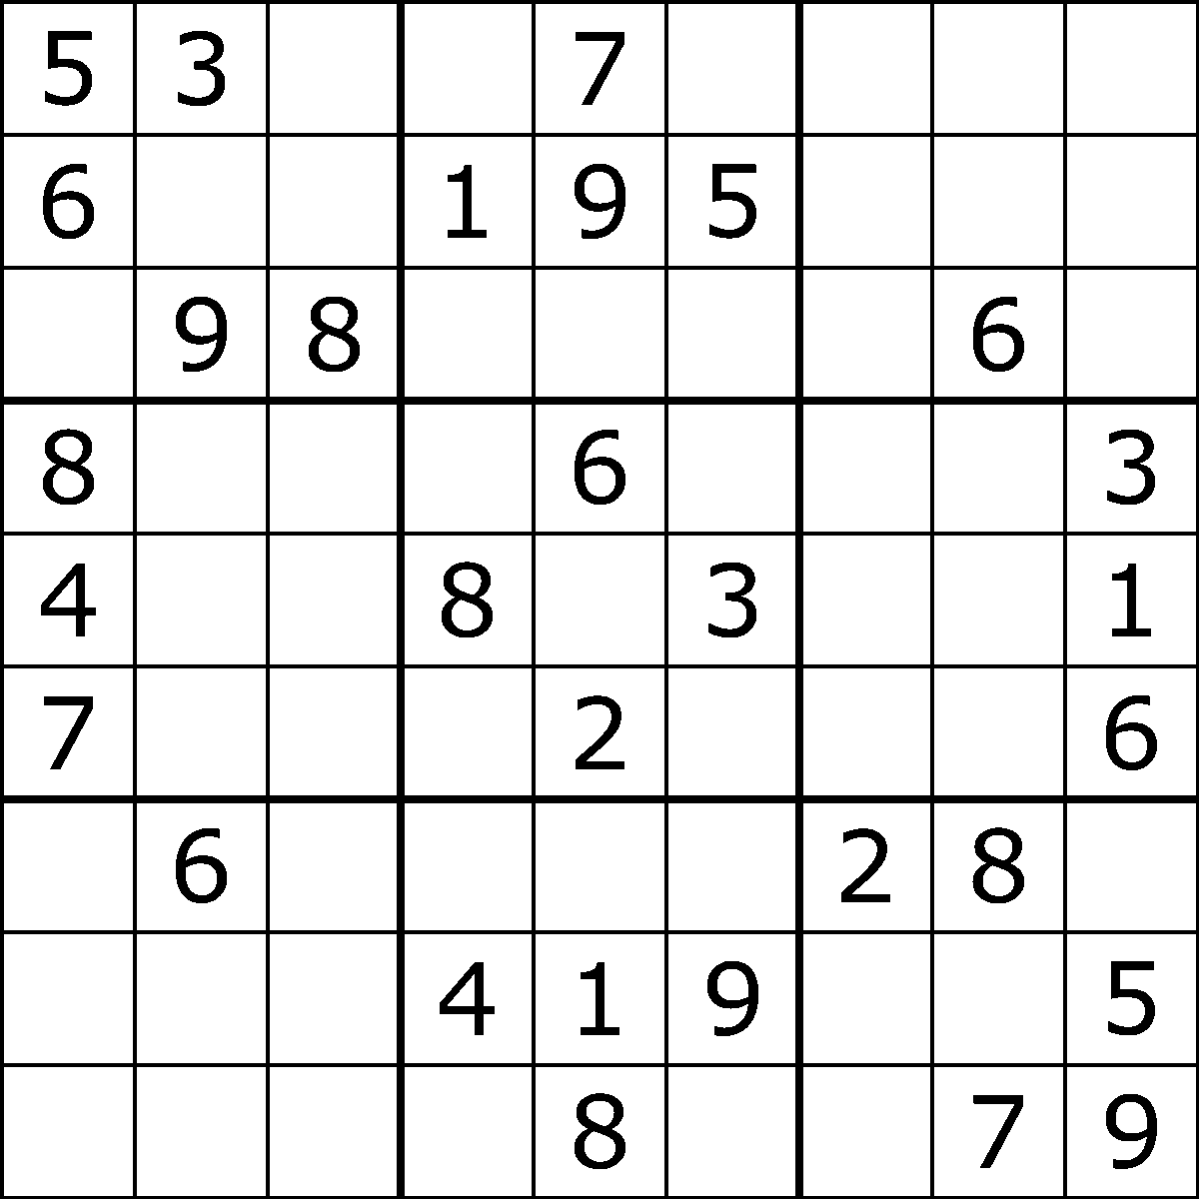

In [4]:
get_contour = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
get_contour = imutils.grab_contours(get_contour)
#get the contour with largest area
get_contour = sorted(get_contour, key=cv2.contourArea, reverse=True)

Grid = None
for cnt in get_contour:
    p = cv2.arcLength(cnt,True)
    app_len = cv2.approxPolyDP(cnt,0.02*p,True)
    if len(app_len) == 4:
        Grid = app_len
        break

output = thresh.copy()
cv2.drawContours(output, [Grid], -1, (0, 255, 0), 2)
#cv2_imshow(output)
puzzle = four_point_transform(thresh, Grid.reshape(4, 2))
puzzle_col = four_point_transform(image, Grid.reshape(4, 2))
result = puzzle.copy()
inv_thresh=puzzle.copy()
image=puzzle_col.copy()

#Invert the binary image to get white background and black text
thresh=cv2.bitwise_not(inv_thresh)
cv2_imshow(thresh)

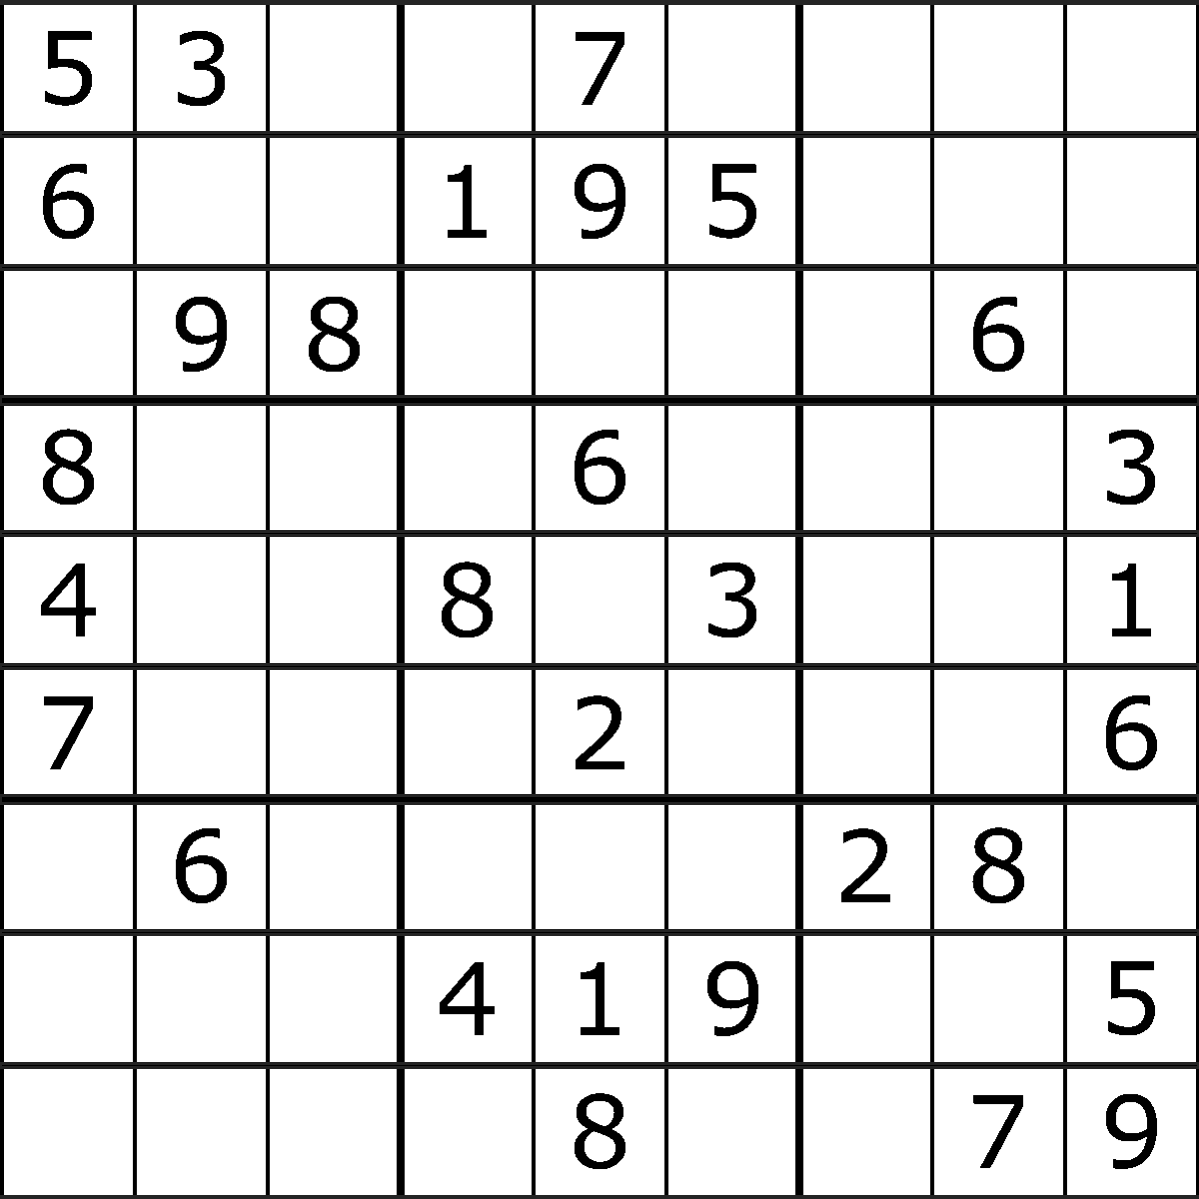

In [5]:
result = thresh.copy()

# Detect horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (80,1))
detect_horizontal = cv2.morphologyEx(inv_thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
get_Hline = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
get_Hline = get_Hline[0] if len(get_Hline) == 2 else get_Hline[1]
#print(get_Hline)
#print(len(get_Hline))
for c in get_Hline:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)
cv2_imshow(result)

code for when rows cannot be extracted at once, only set of three rows extracted at once.

In [6]:
S=[[' ' for i in range(9)] for j in range(9)]
row=9

def det(imb,b,r,S):
    h,w=imb.shape[:2]
    c=-1

    for p in range(1,10):
        start=int(0.11*(p-1)*w)
        end=int(0.11*p*w)
        block=imb[:,start:end]
        kernel=(5,5)
        block=cv2.morphologyEx(block, cv2.MORPH_OPEN, kernel)
        cv2_imshow(block)
        c=c+1

        #check if entire block is white
        if np.mean(block)==255:
            print('white')
        else:
            text = pytesseract.image_to_string(block, config='--psm 13 --oem 3 ')
            
            text=text.lstrip()
            text=text.rstrip()
            if text.isdigit():
                print()
                print("num",text)
                print()
                S[((b-1)*3)+(r-1)][c]=text
    return S

if len(get_Hline)==4:
    b=4
    for i in range(len(get_Hline)-1):
        x1,y1,w1,h1=cv2.boundingRect(get_Hline[i])
        #print('x1:',x1,'y1:',y1,'w1:',w1,'h1:',h1)
        #print('x2:',x2,'y2:',y2,'w2:',w2,'h2:',h2)
        x2,y2,w2,h2=cv2.boundingRect(get_Hline[i+1])
        im=thresh[y2+h2:y1,:]
        print("block")
        cv2_imshow(im)
        col=-1
        row=row-1
        b=b-1
        h,w=im.shape[:2]
        #print('w:',w,'h:',h)

        im1=im[:int(h*0.33),:]
        im2=im[int(h*0.33):int(h*0.66),:]
        im3=im[int(h*0.66):h,:]

        print("row1")
        cv2_imshow(im1)
        S=det(im1,b,1,S)

        print("row2")
        cv2_imshow(im2)
        S=det(im2,b,2,S)

        print("row 3")
        cv2_imshow(im3)
        S=det(im3,b,3,S)
                
print()



Code for when all rows have been extracted 

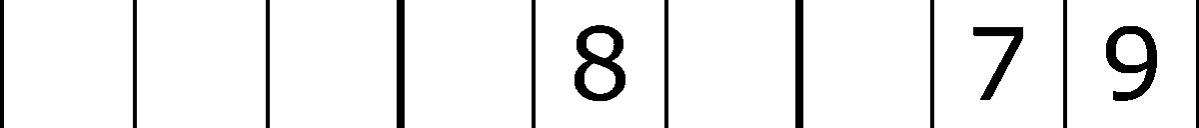

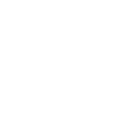

white


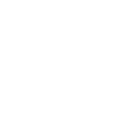

white


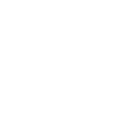

white


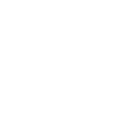

white


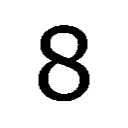


num 8



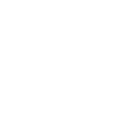

white


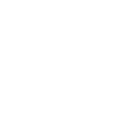

white


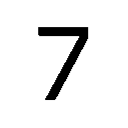


num 7



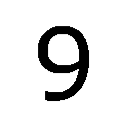


num 9



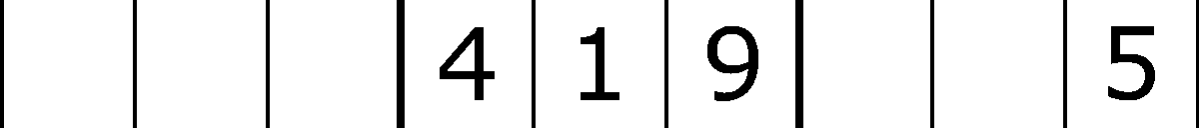

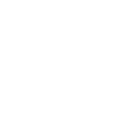

white


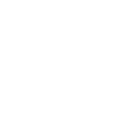

white


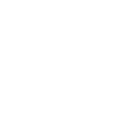

white


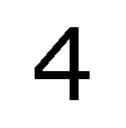


num 4



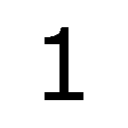


num 1



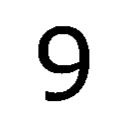


num 9



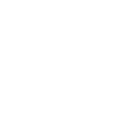

white


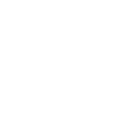

white


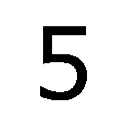


num 5



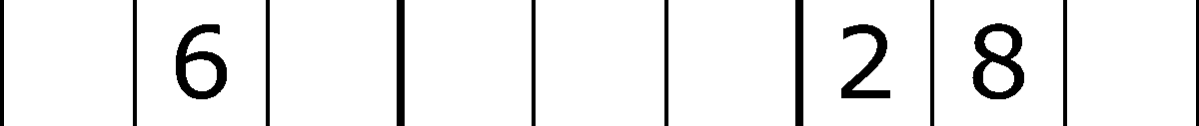

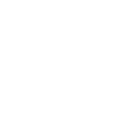

white


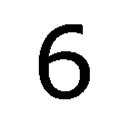


num 6



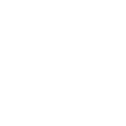

white


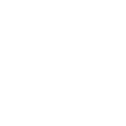

white


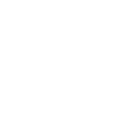

white


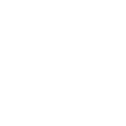

white


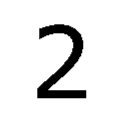


num 2



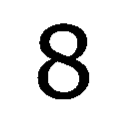


num 8



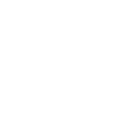

white


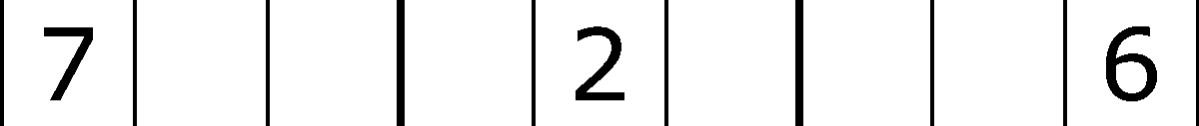

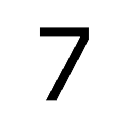


num 7



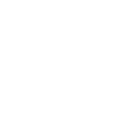

white


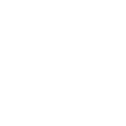

white


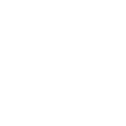

white


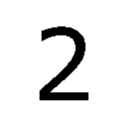


num 2



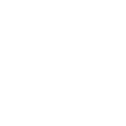

white


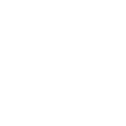

white


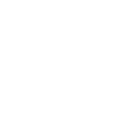

white


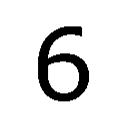


num 6



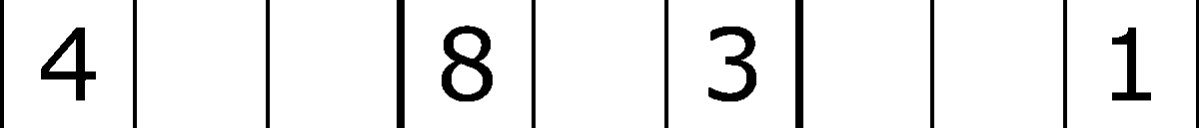

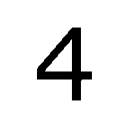


num 4



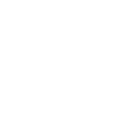

white


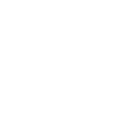

white


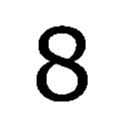


num 8



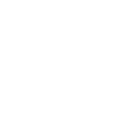

white


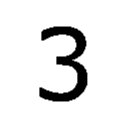


num 3



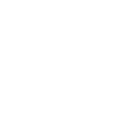

white


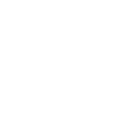

white


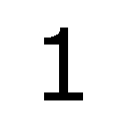


num 1



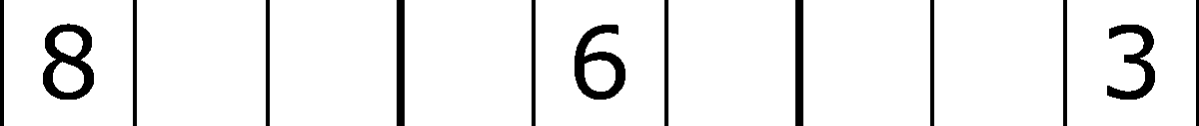

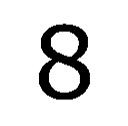


num 8



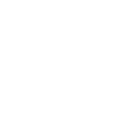

white


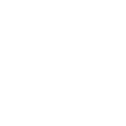

white


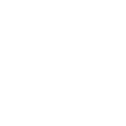

white


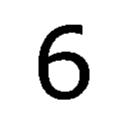


num 6



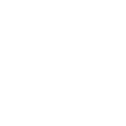

white


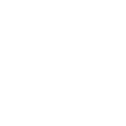

white


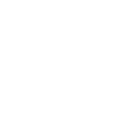

white


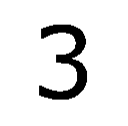


num 3



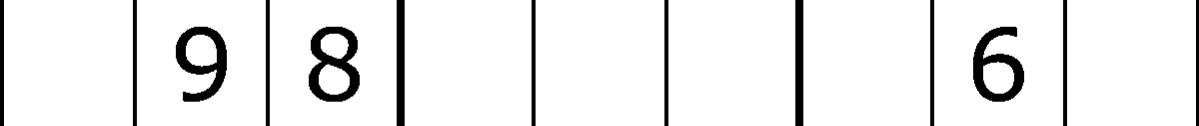

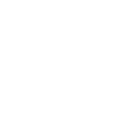

white


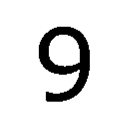


num 9



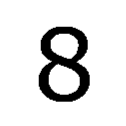


num 8



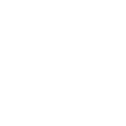

white


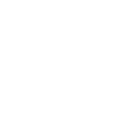

white


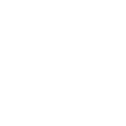

white


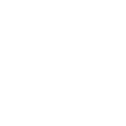

white


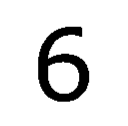


num 6



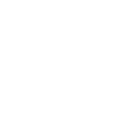

white


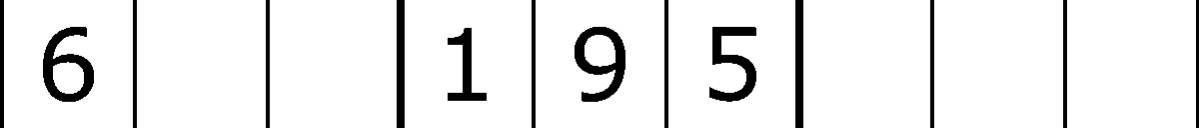

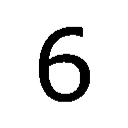


num 6



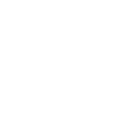

white


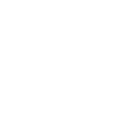

white


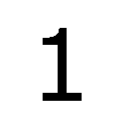


num 1



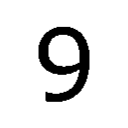


num 9



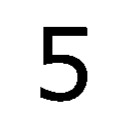


num 5



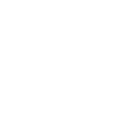

white


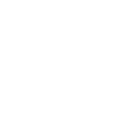

white


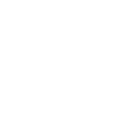

white


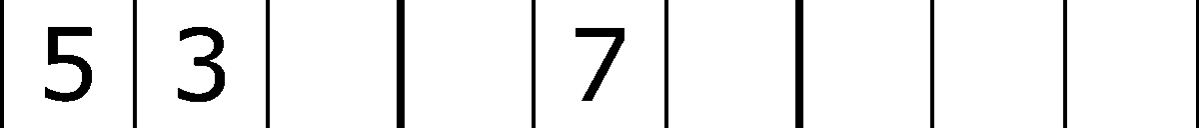

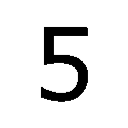


num 5



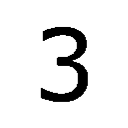


num 3



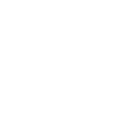

white


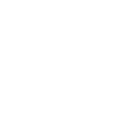

white


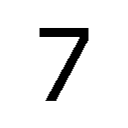


num 7



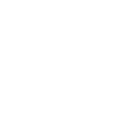

white


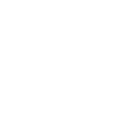

white


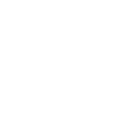

white


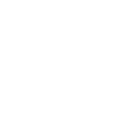

white

+---+---+---+---+---+---+---+---+---+
| 5 | 3 |   |   | 7 |   |   |   |   | 
+---+---+---+---+---+---+---+---+---+
| 6 |   |   | 1 | 9 | 5 |   |   |   | 
+---+---+---+---+---+---+---+---+---+
|   | 9 | 8 |   |   |   |   | 6 |   | 
+---+---+---+---+---+---+---+---+---+
| 8 |   |   |   | 6 |   |   |   | 3 | 
+---+---+---+---+---+---+---+---+---+
| 4 |   |   | 8 |   | 3 |   |   | 1 | 
+---+---+---+---+---+---+---+---+---+
| 7 |   |   |   | 2 |   |   |   | 6 | 
+---+---+---+---+---+---+---+---+---+
|   | 6 |   |   |   |   | 2 | 8 |   | 
+---+---+---+---+---+---+---+---+---+
|   |   |   | 4 | 1 | 9 |   |   | 5 | 
+---+---+---+---+---+---+---+---+---+
|   |   |   |   | 8 |   |   | 7 | 9 |
+---+---+---+---+---+---+---+---+---+



In [7]:
if len(get_Hline)==10:
    for i in range(len(get_Hline)-1):
        x1,y1,w1,h1=cv2.boundingRect(get_Hline[i])
        #print('x1:',x1,'y1:',y1,'w1:',w1,'h1:',h1)
        #print('x2:',x2,'y2:',y2,'w2:',w2,'h2:',h2)
        x2,y2,w2,h2=cv2.boundingRect(get_Hline[i+1])
        #im=image[y2:y1+h1, x2:x1+w1]
        im=thresh[y2+h2:y1,:]
        #im=cv2.bitwise_not(img)
        cv2_imshow(im)
        col=-1
        row=row-1

        h,w=im.shape[:2]
        #print('w:',w,'h:',h)
        
        for j in range(w):
            if im[0][j]==255 and im[0][j-1]!=255:
                start=j
            if im[0][j]!=255 and im[0][j-1]==255:
                end=j
                
                block=im[:,start:end]
                cv2_imshow(block)
                col=col+1

                if np.mean(block)==255:
                    print('white')
                else:
                    #text = pytesseract.image_to_string(inv_block, lang='eng', config='--oem 3 --psm 6 outputbase digits')
                    text = pytesseract.image_to_string(block, config='--psm 13 --oem 3 outputbase digits')
                    
                    text=text.lstrip()
                    text=text.rstrip()
                    if text=='i':
                        text='1'
                    if text.isdigit():
                        print()
                        print("num",text)
                        print()
                        S[row][col]=text
    print()



n=9
def show(M):
    for i in range(n):
        print ('+---+---+---+---+---+---+---+---+---+')
        for j in range(n):
            if j==0:
                print('| '+M[i][j]+' |',end=' ')
            elif i==8 and j==8:
                print (M[i][j]+' |')
            else:
                print (M[i][j]+' |',end=' ')
        if j==8 and i==8:
            print ('+---+---+---+---+---+---+---+---+---+')
        print()

show(S)

Solving Sudoku

In [8]:
import numpy as np
n=9
sqnum={1:[0,0],2:[0,3],3:[0,6],4:[3,0],5:[3,3],6:[3,6],7:[6,0],8:[6,3],9:[6,6]}
valid=['1','2','3','4','5','6','7','8','9']

def show(M):
    for i in range(n):
        print ('+---+---+---+---+---+---+---+---+---+')
        for j in range(n):
            if j==0:
                print('| '+M[i][j]+' |',end=' ')
            elif i==8 and j==8:
                print (M[i][j]+' |')
            else:
                print (M[i][j]+' |',end=' ')
        if j==8 and i==8:
            print ('+---+---+---+---+---+---+---+---+---+')
        print()

#check if digit 'num' is present in block number 'sq'
def check_sq(M,num,sq):
    #print("in check_sq")
    row=sqnum[sq][0]
    col=sqnum[sq][1]
    for i in range(row,row+3):
        for j in range(col,col+3):
            if str(M[i][j])==str(num):
                #print("got",num," at",i,j)
                return(True)
    return(False)

#return list of block numbers in which digit 'num' is not present
def not_in_sq(M,num):
    not_in=[]
    for sq in range(1,n+1):
        #print("sq",sq)
        if not check_sq(M,num,sq):
            not_in.append(sq)           
    return(not_in)

#update/fill digits by blocks
def by_num_sq(M):
    MT=np.transpose(M)
    #print(MT)
    for num in range(1,n+1):
        goto=not_in_sq(M,num)
        #print(num,goto )
        for sq in goto:
            row=sqnum[sq][0]
            col=sqnum[sq][1]
            #print("r,c",row,col)
            subM=[[True,True,True] for j in range(3)]
            for i in range(3):
                for j in range(3):
                    if M[row+i][col+j]!=' ':
                        subM[i][j]=False
            subM=np.array(subM)
            
            for line in range(0,3):
                if str(num) in M[row+line]:
                    #print('line',line,'M[',row+line,']',M[row+line])
                    subM[line]=[False,False,False]
                    #print(subM)
                
                #print('line',line,'MT[',col+line,']',MT[col+line])
                if str(num) in MT[col+line]:
                    subM[:,line]=False
                    #print(subM)
                
            #print(sq,subM)
            if np.sum(subM==True)==1:
                #print("------------updating----------------num",num, "in sq",sq)
                pos=np.where(subM==True)
                r=pos[0][0]+row
                c=pos[1][0]+col
                M[r][c]=str(num)
                #print("updated to",M[r][c], "at pos",r,c)
            #show(M)
    return(M)

#fill row when only one position left unfilled      
def fill_row(M):
    for i in range (n):
        #print("----row",i,'-------------')
        unique, counts = np.unique(M[i], return_counts=True)
        d=dict(zip(unique, counts)) 
        #print(d)
        empty=' '
        if empty in d and d[empty]==1:
            #print("only 1 value empty")
            for val in valid:
                if val not in M[i]:
                    #print("missing value",val)
                    pos=np.where(M[i]==' ')
                    #print(pos)
                    M[i][pos[0]]=val
    return(M)

#fill column when only one position left unfilled  
def fill_col(M):
    MT=np.transpose(M)
    for i in range (n):
        #print("----col",i,'-------------')
        unique, counts = np.unique(MT[i], return_counts=True)
        d=dict(zip(unique, counts)) 
        #print(d)
        empty=' '
        if empty in d and d[empty]==1:
            #print("only 1 value empty")
            for val in valid:
                if val not in MT[i]:
                    #print("missing value",val)
                    pos=np.where(MT[i]==' ')
                    #print(pos)
                    MT[i][pos[0]]=val
    M=np.transpose(MT)
    return(M)

#get block number based on cell position
def dec_block(i,j):
    if i in [0,1,2]:
        if j in [0,1,2]:
            block=1
        elif j in [3,4,5]:
            block=2
        elif j in [6,7,8]:
            block=3
    elif i in [3,4,5]:
        if j in [0,1,2]:
            block=4
        elif j in [3,4,5]:
            block=5
        elif j in [6,7,8]:
            block=6
    elif i in [6,7,8]:
        if j in [0,1,2]:
            block=7
        elif j in [3,4,5]:
            block=8
        elif j in [6,7,8]:
            block=9
    return (block)

#fill rows 
def update_rows(M):
    for num in range(1,10):
        #print(num)
        for i in range(n):
            if str(num) not in M[i]:
                for j in range(n):
                    MT=np.transpose(M)
                    if M[i][j]==' ':
                        subM=[True]*9
                        subM=np.array(subM)
                        for k in range(n):
                            if M[i][k]!=' ':
                                subM[k]=False
                        block=dec_block(i,j)
                        if str(num) in MT[j] or check_sq(M,num,block):
                            subM[j]=False
                        #print(subM)
                        if np.sum(subM==True)==1:
                            #print("------------updating----------------num",num, "in sq",block)
                            pos=np.where(subM==True)
                            M[i][pos[0][0]]=str(num)
                            #print("updated to",M[i][pos[0][0]], "at pos",i,pos[0][0])
    return (M)

#fill columns              
def update_cols(M):
    for num in range(1,10):
        #print(num)
        MT=np.transpose(M)
        for i in range(n):
            if str(num) not in MT[i]:
                for j in range(n): 
                    if MT[i][j]==' ':
                        subM=[True]*9
                        subM=np.array(subM)
                        for k in range(n):
                            if MT[i][k]!=' ':
                                subM[k]=False
                        block=dec_block(i,j)
                        if str(num) in M[j] or check_sq(MT,num,block):
                            subM[j]=False
                        #print(subM)
                        if np.sum(subM==True)==1:
                            #print("------------updating----------------num",num, "in sq",block)
                            pos=np.where(subM==True)
                            MT[i][pos[0][0]]=str(num)
                            #print("updated to",MT[i][pos[0][0]], "at pos",i,pos[0][0])
                            M=np.transpose(MT)
    return (M)
            

def run(M):
    M=np.array(M)
    count=0
    while(np.sum(M==' ')!=0):
        if count>50:
            print("sorry could not solve")
            return
        #show(M)
        M=by_num_sq(M)
        #show(M)
        M=fill_row(M)
        #show(M)
        M=fill_col(M)
        #show(M)
        #print("UPDATE ROWS")
        M=update_rows(M)
        #show(M)
        #print("UPDATE COLS")
        M=update_cols(M)
        #show(M)
        count=count+1
        #print("---iteration no",count," 1 complete---")
    print(count,"iterations taken to solve")
    show(M)
    
run(S)

4 iterations taken to solve
+---+---+---+---+---+---+---+---+---+
| 5 | 3 | 4 | 6 | 7 | 8 | 9 | 1 | 2 | 
+---+---+---+---+---+---+---+---+---+
| 6 | 7 | 2 | 1 | 9 | 5 | 3 | 4 | 8 | 
+---+---+---+---+---+---+---+---+---+
| 1 | 9 | 8 | 3 | 4 | 2 | 5 | 6 | 7 | 
+---+---+---+---+---+---+---+---+---+
| 8 | 5 | 9 | 7 | 6 | 1 | 4 | 2 | 3 | 
+---+---+---+---+---+---+---+---+---+
| 4 | 2 | 6 | 8 | 5 | 3 | 7 | 9 | 1 | 
+---+---+---+---+---+---+---+---+---+
| 7 | 1 | 3 | 9 | 2 | 4 | 8 | 5 | 6 | 
+---+---+---+---+---+---+---+---+---+
| 9 | 6 | 1 | 5 | 3 | 7 | 2 | 8 | 4 | 
+---+---+---+---+---+---+---+---+---+
| 2 | 8 | 7 | 4 | 1 | 9 | 6 | 3 | 5 | 
+---+---+---+---+---+---+---+---+---+
| 3 | 4 | 5 | 2 | 8 | 6 | 1 | 7 | 9 |
+---+---+---+---+---+---+---+---+---+

